In [ ]:
"""
README :
ce code permet 1) de faire l'analyse factorielle
         2) de concaténer listings et les de scores de tactiques
               -->listings_tactics

"""

import pandas as pd
import os
import time
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# charger les listinngs avec résultat de zéro shot :


In [ ]:
result=pd.read_csv("../result_airbnb/listings_zsc.csv")
print(len(result))

labels=[
    'open to different cultures', 'cosmopolitan','international view', 'cultural exchange',
    'personal life', 'life experiences', 'divers interests', 'hobbies', 'enjoy life',
    'meet new people', 'welcoming', 'friendly', 'sociable', 'interpersonal interaction',
    'thoughtful service', 'attentive to needs', 'willing to help', 'responsive',
    'fan of Airbnb', 'Airbnb community','love Airbnb', 'travel with Airbnb'
]
result_dropna=result[result[labels].sum(axis=1)!=0]
print(len(result_dropna))

scores=result_dropna[labels]
print(len(scores))
# display(scores.head())

D:\temp\ipykernel_15112\2670460560.py:1: DtypeWarning: Columns (7,23,42,46,47,62) have mixed types. Specify dtype option on import or set low_memory=False.
  result=pd.read_csv("../result_airbnb/listings_zsc.csv")


74330
31680
31680


# violinplot:

31680


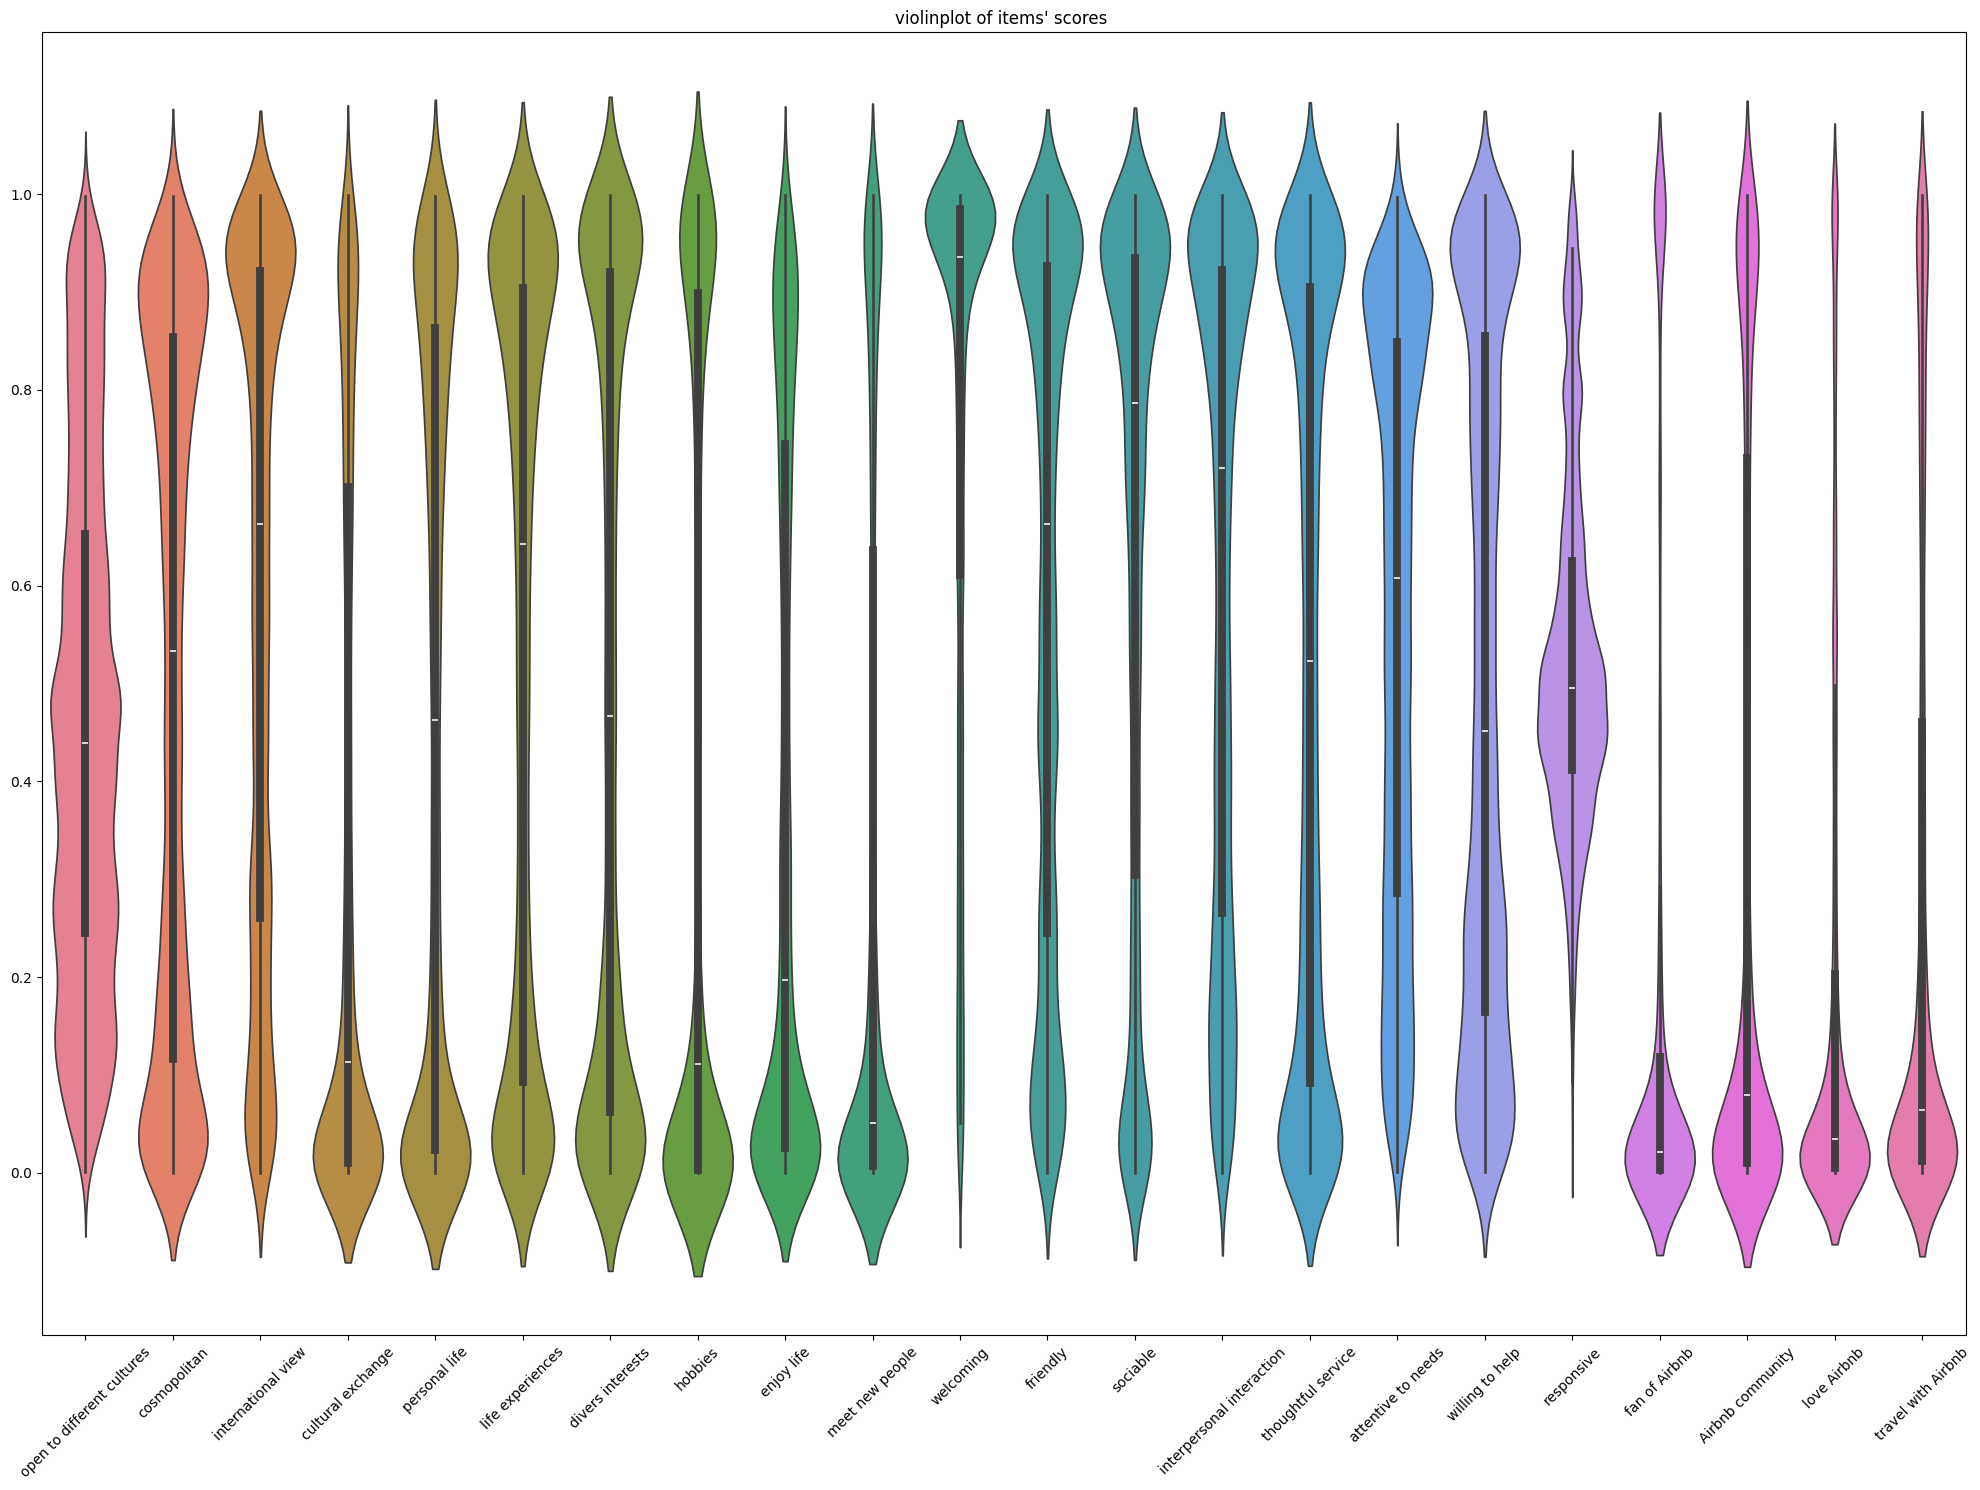

In [ ]:
data=scores[scores[labels].sum(axis=1)!=0]#exlut des lignes vides
print(len(data))
plt.figure(figsize=(20,15))
sns.violinplot(data)
plt.title("violinplot of items' scores ")
plt.xticks(rotation=45)
plt.savefig('../figs/violonplot des items.jpg', dpi=300)
plt.tight_layout()

# analyse factorielle:

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
data=scores[scores[labels].sum(axis=1)!=0]
kmo_all, kmo_model = calculate_kmo(data)
print(kmo_model)

0.872744441619384


d:\miniconda3\envs\transformers_env\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


d:\miniconda3\envs\transformers_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


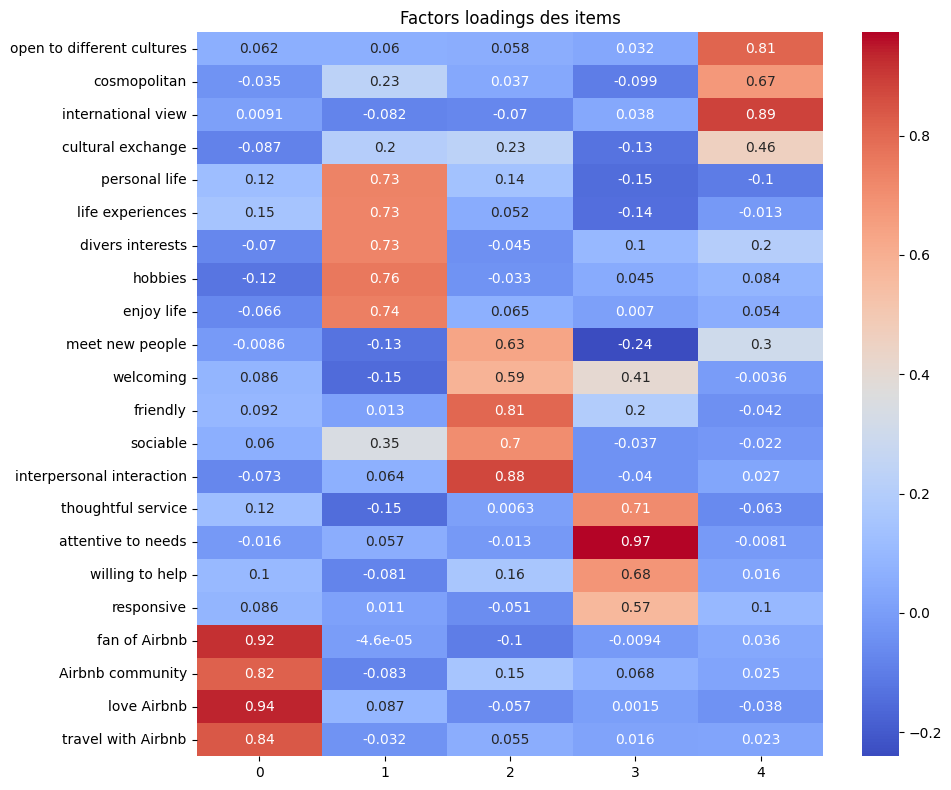

In [ ]:
from factor_analyzer import FactorAnalyzer
#FIT:

data=scores[scores[labels].sum(axis=1)!=0]
n_factors=5
fa = FactorAnalyzer(n_factors=n_factors, rotation='oblimin', method='minres')
fa.fit(data)

##LOADINGS :
loadings = fa.loadings_
plt.figure(figsize=(10,8))
loadings_df=pd.DataFrame(loadings, index=data.columns)
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('Factors loadings des items')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../figs/items_fa.jpeg', dpi=300)
plt.show()


# PCA 3D:

Explained variance ratios (3D): 0.7930276605801134


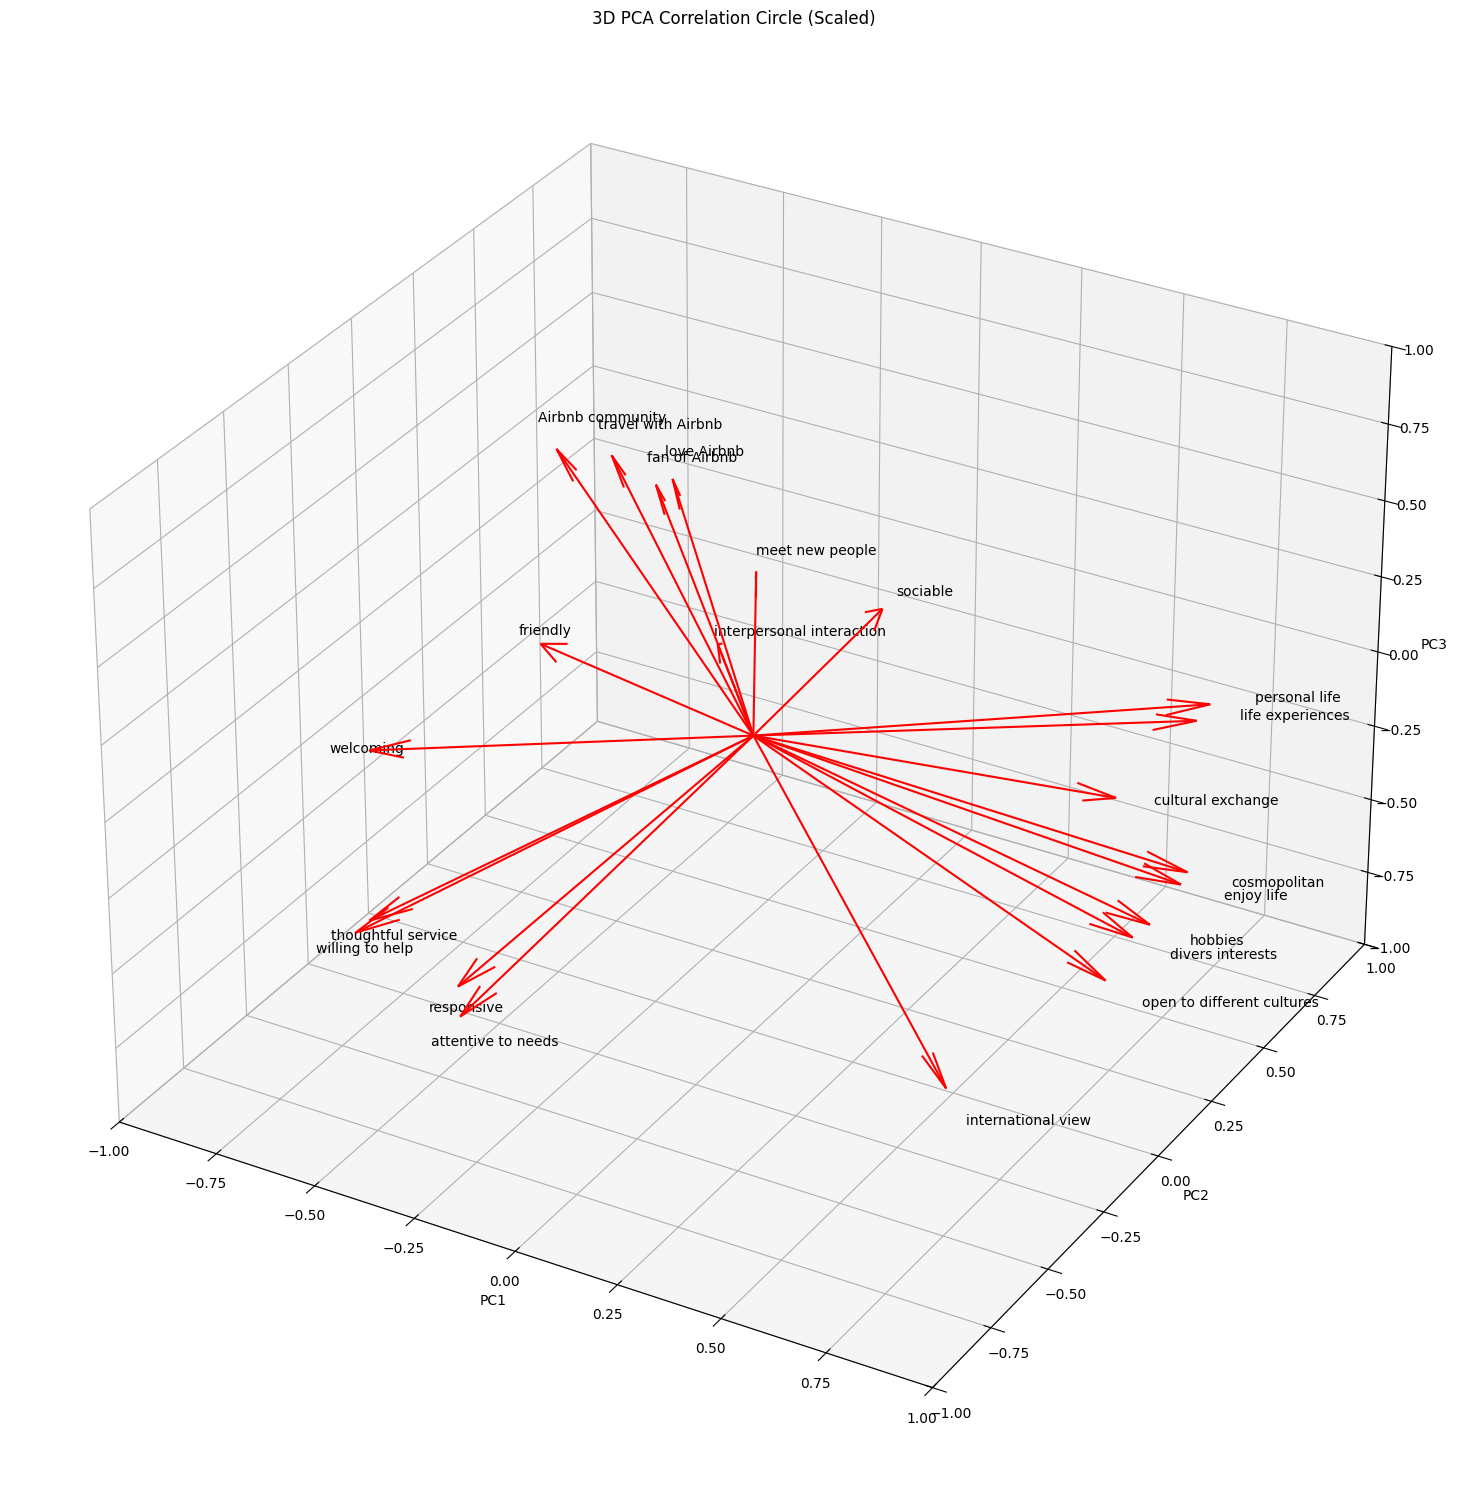

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_3d=PCA(n_components=3)
loadings_3d=pca_3d.fit_transform(loadings)


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')


# 缩放向量
norms = np.linalg.norm(loadings_3d, axis=1)
loadings_3d_scaled = loadings_3d / norms[:, np.newaxis] #0.8
print("Explained variance ratios (3D):", pca_3d.explained_variance_ratio_.sum())


# 画箭头
for i, var in enumerate(data.columns):
    ax.quiver(0, 0, 0,
              loadings_3d_scaled[i, 0],
              loadings_3d_scaled[i, 1],
              loadings_3d_scaled[i, 2],
              color='red', arrow_length_ratio=0.1)

    ax.text(loadings_3d_scaled[i, 0]*1.1,
            loadings_3d_scaled[i, 1]*1.1,
            loadings_3d_scaled[i, 2]*1.1,
            var, fontsize=10)

# 坐标轴限制
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.title('3D PCA Correlation Circle (Scaled)')
plt.tight_layout()
# plt.savefig("../figs/CC3D.jpg",dpi=300)
plt.show()

# cronbach alpha:

In [ ]:
labels2tac={
    "openness":['open to different cultures','cosmopolitan','international view','cultural exchange'],
    "authenticity":['personal life','life experiences','divers interests','hobbies','enjoy life'],
    'sociability':['meet new people', 'welcoming', 'friendly','sociable', 'interpersonal interaction'],
    'self_promotion':['thoughtful service', 'attentive to needs','willing to help','responsive'],
    'exemplification':["fan of Airbnb","Airbnb community",'love Airbnb', 'travel with Airbnb']
}

from pingouin import cronbach_alpha

data=scores[scores[labels].sum(axis=1)!=0]
print(len(data))
for tactic, labels in labels2tac.items():
    alpha, _ = cronbach_alpha(data[labels])
    print(tactic, alpha)

31680
openness 0.8406418615059442
authenticity 0.8803334350314671
sociability 0.858935323080279
self_promotion 0.8539860518071372
exemplification 0.932643833070343


# calculer les scores des tactiques selon fa:

In [ ]:
data=scores[scores[labels].sum(axis=1)!=0]
n_factors=5
fa = FactorAnalyzer(n_factors=n_factors, rotation='oblimin', method='minres')
fa.fit(data)
scores_fa = fa.transform(data)
print(scores_fa.shape)


scores_df = pd.DataFrame(scores_fa, columns=['exemplification','authenticity','sociability','self_promotion','openness'])# selon l'order sur le heatmap
tactics=['openness','authenticity','sociability','self_promotion','exemplification']
scores_df=scores_df[tactics_order]
scores_df = scores_df.reset_index(drop=True)

d:\miniconda3\envs\transformers_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(31680, 5)


d:\miniconda3\envs\transformers_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
#faire correspondre 'host_about' avec les tactics
result_dropna=result_dropna.reset_index(drop=True)
result_dropna_tactics=pd.concat([result_dropna, scores_df], axis=1)
result_dropna_tactics=result_dropna_tactics[['host_about']+tactics_order]
result_dropna_tactics=result_dropna_tactics.drop_duplicates()
print(len(result_dropna_tactics))

#renvoyer aux listings original:
result_tactics=result.merge(result_dropna_tactics, left_on='host_about', right_on='host_about', how='left')
result_tactics[labels+tactics]=result_tactics[labels+tactics].fillna(0)
print(len(result_tactics))
display(result_tactics.head())
result_tactics.to_csv('../data/listings_tactics.csv', index=False)


19988
74330


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,responsive,fan of Airbnb,Airbnb community,love Airbnb,travel with Airbnb,openness,authenticity,sociability,self_promotion,exemplification
0,0,3109.0,https://www.airbnb.com/rooms/3109,2.023121e+13,2023-12-12,city scrape,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,NaN,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,5396.0,https://www.airbnb.com/rooms/5396,2.023121e+13,2023-12-14,city scrape,Rental unit in Paris · ★4.59 · Studio · 1 bed ...,NaN,"You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,...,0.973056,0.285508,0.749040,0.137775,0.312311,0.565581,-0.008205,0.957697,1.416490,0.373926
2,2,81106.0,https://www.airbnb.com/rooms/81106,2.023121e+13,2023-12-13,city scrape,Rental unit in Paris · ★4.84 · 1 bedroom · 1 b...,NaN,The neighborhood will show you an other side o...,https://a0.muscache.com/pictures/miso/Hosting-...,...,0.639749,0.095681,0.093284,0.021362,0.258570,-0.404478,1.019766,-0.491341,0.606779,-0.441423
3,3,7397.0,https://www.airbnb.com/rooms/7397,2.023121e+13,2023-12-13,city scrape,Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...,NaN,NaN,https://a0.muscache.com/pictures/67928287/330b...,...,0.380097,0.000321,0.000877,0.000308,0.001214,-1.157850,-0.733577,-1.889289,-1.456089,-0.778443
4,4,7964.0,https://www.airbnb.com/rooms/7964,2.023121e+13,2023-12-12,city scrape,Rental unit in Paris · ★4.80 · 1 bedroom · 1 b...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,...,0.535471,0.294100,0.898153,0.050386,0.692560,-0.620812,-0.982499,1.353823,1.013025,0.526214


d:\miniconda3\envs\transformers_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


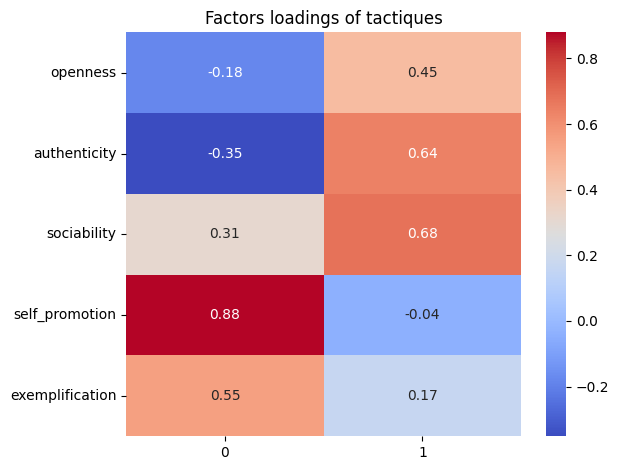

In [ ]:
data=scores_df
fa = FactorAnalyzer(n_factors=2, rotation='oblimin', method='minres')
fa.fit(data)

##LOADINGS :
loadings = fa.loadings_
loadings_df=pd.DataFrame(loadings, index=data.columns)
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('Factors loadings of tactics')
plt.tight_layout()
plt.savefig("../figs/tactics_fa.jpg",dpi=300)
plt.show()

# si on fait pas zéro shot selon la langue, les scores se convergent mal.

In [ ]:
res_=pd.read_csv('../result_airbnb/modernbert_zsc_final.csv')
# display(res_)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
data=res_[labels_en]
kmo_all, kmo_model = calculate_kmo(data)
print(kmo_model)

0.8622003093920207


d:\miniconda3\envs\transformers_env\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


d:\miniconda3\envs\transformers_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


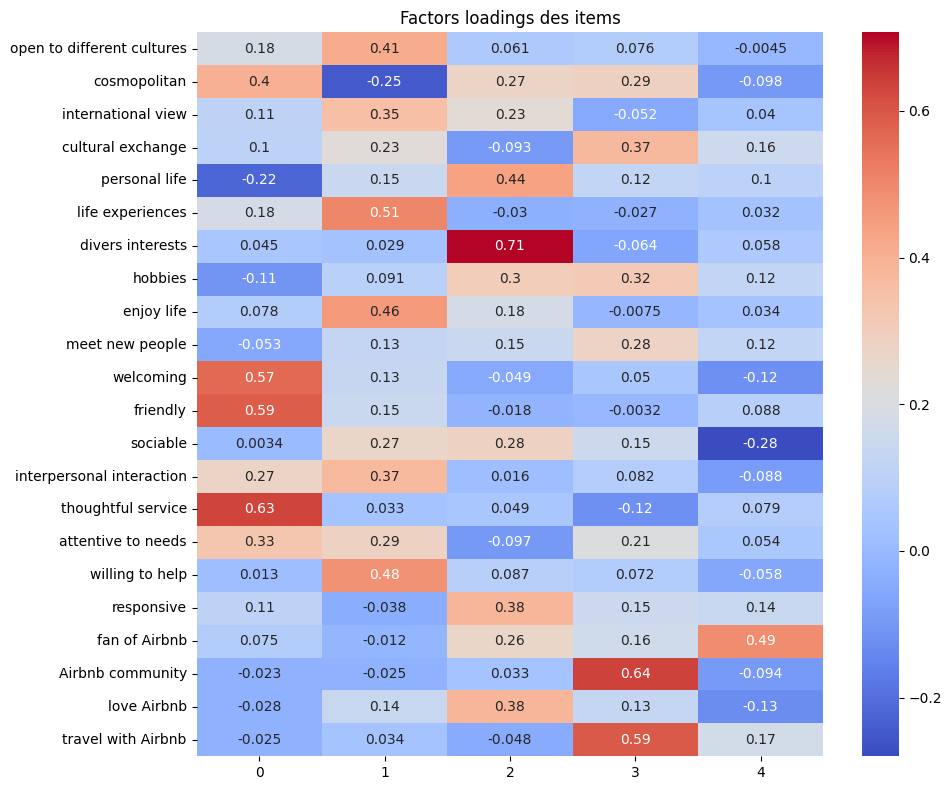

(31838, 5)
[[ 1.32225969  0.93479798 -0.70282046 -0.68984369 -0.50841556]
 [ 0.89249279  1.34902714  1.6901504   0.75328751  0.6706775 ]
 [-1.87888576 -1.19930439  0.36624805 -1.05907486 -0.27270085]
 ...
 [-0.35242173 -0.47397435 -1.4595383   0.64715313 -0.29810127]
 [ 1.49367558  1.1507658   1.75948125  1.79680414  0.88358371]
 [-1.22775763 -0.89435858 -1.14312358 -1.2875708  -0.18515977]]


d:\miniconda3\envs\transformers_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from factor_analyzer import FactorAnalyzer
#FIT:
fa = FactorAnalyzer(n_factors=5, rotation='oblimin', method='minres')
fa.fit(data)

##LOADINGS :
loadings = fa.loadings_
plt.figure(figsize=(10,8))
loadings_df=pd.DataFrame(loadings, index=data.columns)
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('Factors loadings des items')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

scores = fa.transform(data)
print(scores.shape)
print(scores)

In [ ]:
labels2tac={
    "openness":['open to different cultures','cosmopolitan','international view','cultural exchange'],
    "authenticity":['personal life','life experiences','divers interests','hobbies','enjoy life'],
    'sociability':['meet new people', 'welcoming', 'friendly','sociable', 'interpersonal interaction',],
    'self_promotion':['thoughtful service', 'attentive to needs','willing to help','responsive'],
    'exemplification':["fan of Airbnb","Airbnb community",'love Airbnb', 'travel with Airbnb']
}
from pingouin import cronbach_alpha

print(len(data))
for tactic, labels in labels2tac.items():
    alpha, _ = cronbach_alpha(data[labels])
    print(tactic, alpha)

31838
openness 0.508230272814819
authenticity 0.6056231782159899
sociability 0.554171756455559
self_promotion 0.4767869299852925
exemplification 0.5332478914196004
